> Introdução à Ciência dos Dados \
> Ciência da Computação – UFV/Florestal


* **Nome:** Luciano Belo
* **Matrícula:**  3897

# Aula Prática 03
##  Teorema Central do Limite

**Objetivo:** Aplicar os conceitos do teorema central do limite para inferir conhecimento sobre uma população. \
**Pré-requisitos:** Linguagem de programação Python, estatística básica \
**Meta:** Ao final da prática, o aluno será capaz de utilizar ferramentas de análise de dados para inferir características de uma população a partir de amostras, e também de verificar se uma amostra pertence ou não a determinada população.

----

In [48]:
### NÃO REMOVA ESSA CÉLULA! ####
!pip --no-cache-dir install --upgrade learntools_dados_ufv

!wget https://raw.githubusercontent.com/gfviegas/CCF425-resources/master/p3/renda_populacao.csv
!wget https://raw.githubusercontent.com/gfviegas/CCF425-resources/master/p3/renda_amostra1.csv

!wget https://raw.githubusercontent.com/gfviegas/CCF425-resources/master/p3/pesos_populacao.csv
!wget https://raw.githubusercontent.com/gfviegas/CCF425-resources/master/p3/pesos_amostra1.csv
!wget https://raw.githubusercontent.com/gfviegas/CCF425-resources/master/p3/pesos_amostra2.csv
!wget https://raw.githubusercontent.com/gfviegas/CCF425-resources/master/p3/pesos_amostra3.csv
!wget https://raw.githubusercontent.com/gfviegas/CCF425-resources/master/p3/pesos_amostra4.csv

--2022-05-19 15:51:44--  https://raw.githubusercontent.com/gfviegas/CCF425-resources/master/p3/renda_populacao.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88501 (86K) [text/plain]
Saving to: ‘renda_populacao.csv.1’

renda_populacao.csv 100%[===================>]  86.43K  --.-KB/s    in 0.01s   

2022-05-19 15:51:44 (6.49 MB/s) - ‘renda_populacao.csv.1’ saved [88501/88501]

--2022-05-19 15:51:44--  https://raw.githubusercontent.com/gfviegas/CCF425-resources/master/p3/renda_amostra1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 O

In [49]:
#### Não altere essa célula!!! ####
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from learntools_dados_ufv.core import binder; binder.bind(globals())
from learntools_dados_ufv.ccf425.pratica_3 import *

# Roteiro

## Leitura dos dados
Veja os dados do arquivo `renda_populacao.csv`. 

Use a opção `squeeze=True` para obter uma Série do arquivo e não um DataFrame (comportamento default). Note que não possui cabeçalhos.

In [50]:
series = pd.read_csv('./renda_populacao.csv', index_col=False, header=None, squeeze=True)
series

0        9536.34
1      267273.60
2       39596.61
3       24992.04
4        9286.11
          ...   
9995    31717.13
9996    30511.21
9997     9335.55
9998     9905.62
9999   122687.20
Name: 0, Length: 10000, dtype: float64

## Explorar os dados com base em estatísticas descritivas

Observação: para formatar a saída dos números reais no pandas, utilizar o comando: `pd.options.display.float_format = "{:.2f}".format`


In [51]:
pd.options.display.float_format = "{:.2f}".format

series.describe()

count     10000.00
mean      36210.55
std       46539.07
min         391.72
25%       11205.69
50%       22006.79
75%       43049.55
max     1119768.63
Name: 0, dtype: float64

## Plotar a distribuição dessa população

Observação: Por enquanto vamos simplesmente aceitar esse código usando as bibliotecas _matplotlib_ e _seaborn_. Depois vamos entender melhor como gerar gráficos.

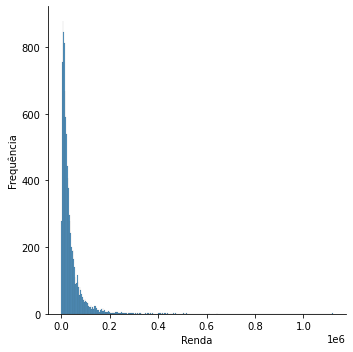

In [52]:
def plot_dist_data(data):
    ax = sns.displot(data)
    ax.set(xlabel="Renda", ylabel="Frequência")

    plt.show()


plot_dist_data(series)

## Plotar uma amostra dessa população de tamanho 10

Note que a amostragem é aleatória, e portanto, em cada execução vai gerar um gráfico diferente.

In [53]:
# Gera uma amostra de tamanho 100 dos dados. 
sample = series.sample(100)
sample

7526   55814.43
2879   56823.57
7085    7276.36
8030   10334.52
3838   45065.50
         ...   
7020   60163.39
7180   27503.87
1149    7337.56
1407   14031.57
7145   16637.35
Name: 0, Length: 100, dtype: float64

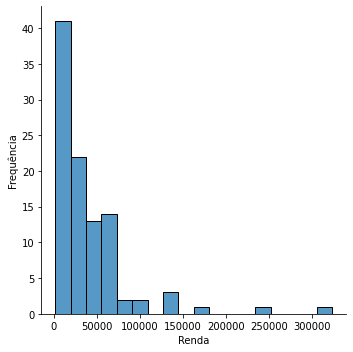

In [54]:
# Plota de fato a amostra
plot_dist_data(sample)

## Explorar os dados com base em estatísticas descritivas da amostra

Veja a média da amostra. Esse valor está dentro do esperado para a população?

Repita os últimos 3 passos (gerar amostra, plotar amostra, calcular média da amostra) algumas vezes para verificar o que acontece com a média. 

> Observação: os resultados de cada execução serão diferentes, pois estamos pegando amostras aleatórias.

In [55]:
sample.describe()

count      100.00
mean     40375.85
std      47262.45
min       1946.74
25%      12143.24
50%      26224.88
75%      54320.72
max     323691.03
Name: 0, dtype: float64

## Gerar métricas de um conjunto de amostras aleatórias

Vamos gerar 50 amostras aleatórias da população, calcular a média de cada amostra, plotar a distribuição das médias, e calcular a média das médias das amostras e o erro padrão.

Média das médias: 35227.56
Erro padrão: 6581.62


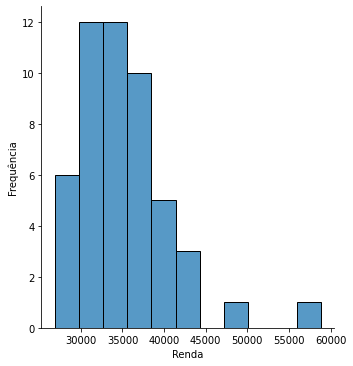

In [56]:
# Gerar N amostras de tamanho T e plota as médias das amostras
def analyze_samples(N=50, T=100):
    # Gera N amostras diferentes de tamanho T
    samples_list = [series.sample(T) for _i in range(0, N)]
    # Gera uma lista com a média de cada uma das amostras acima
    means_of_samples = [s.mean() for s in samples_list]

    # Média das médias
    mean_of_means = np.mean(means_of_samples)

    # Erro padrão
    std_error = series.std() / np.sqrt(len(means_of_samples))

    print("Média das médias: {:.2f}".format(mean_of_means))
    print("Erro padrão: {:.2f}".format(std_error))

    plot_dist_data(means_of_samples)



analyze_samples(50, 100)

## Analisar o conjunto de amostras
Repita a célula anterior algumas vezes. Observe o gráfico.

- Ele segue a distribuição Normal?
- As médias das médias das amostras estão próximas da média da população?
- E os erros padrões?


## Veja amostras maiores
Repita o processo apresentado (de gerar amostras, calcular médias e ver gráficos), mas agora com um número maior de amostras (100, 250, 500). 

Podemos observar que a distribuição das médias se aproxima mais da distribuição Normal? E o que acontece com o erro padrão?

Média das médias: 36729.77
Erro padrão: 4653.91


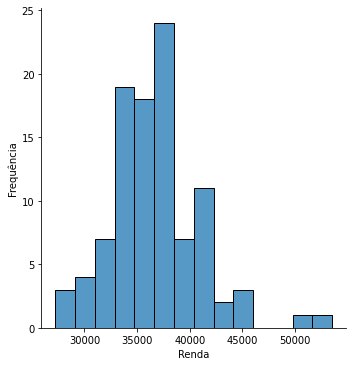

In [57]:
analyze_samples(N=100)

Média das médias: 36119.63
Erro padrão: 2943.39


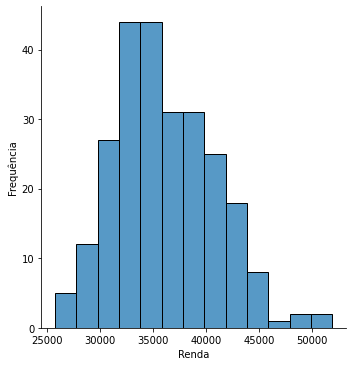

In [58]:
analyze_samples(N=250)

Média das médias: 36092.74
Erro padrão: 2081.29


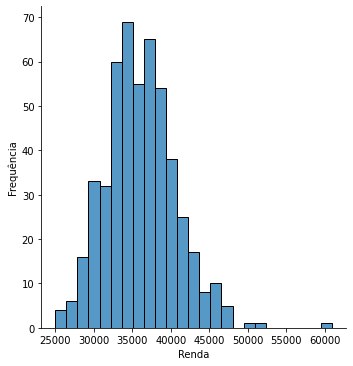

In [59]:
analyze_samples(N=500)

## Verificar se uma amostra pertence a população

Leia o arquivo de amostra de rendas (renda_amostra1.csv). Verifique se essa amostra faz parte da população de renda (renda.csv) ou não: 
1. Calcule a média e o erro padrão;
2. Verifique a quantos erros da média da população a média da amostra está;


In [60]:
sample_1 = pd.read_csv("./renda_amostra1.csv", index_col=False, header=None, squeeze=True)
sample_1

0      4462.94
1     28223.57
2     64744.10
3      4326.30
4      6050.94
        ...   
95     6257.41
96     7002.31
97     2489.48
98    59734.25
99   194382.99
Name: 0, Length: 100, dtype: float64

In [ ]:
series_mean = series.mean()
sample_1_mean = sample_1.mean()
std_error = series.std() / np.sqrt(len(sample_1))

print("Média da população: {:.2f}".format(series_mean))
print("Média da amostra: {:.2f}".format(sample_1_mean))
print("Erro padrão: {:.2f}".format(std_error))

Média da população: 36210.55
Média da amostra: 35515.00
Erro padrão: 4653.91


In [ ]:
# Calcula a diferença entre a média da população e da amostra, em termos do erro padrão.
std_error_distance = abs(series_mean - sample_1_mean) / std_error

print("A diferença entre a média da população e da amostra é de {:.4f} erros padrão".format(std_error_distance))

A diferença entre a média da população e da amostra é de 0.1495 erros padrão


# Exercícios

## 1. Leia os dados de uma população de pesos (_pesos_populacao.csv_)
Armazene na variável `population_weight`. 

Chame a função `q1.check()` no fim da célula para verificar a resposta.
Você pode pedir dicas com `q1.hint()`

In [61]:
# q1.hint()

population_weight =  pd.read_csv("./pesos_populacao.csv", index_col=False, header=None, squeeze=True)
display(population_weight)

q1.check()

0      158.98
1      176.40
2      148.37
3      184.33
4      188.31
        ...  
9995   187.56
9996   143.56
9997   135.31
9998   157.65
9999   170.29
Name: 0, Length: 10000, dtype: float64

<IPython.core.display.Javascript object>

<span style="color:#33cc33">CORRETO:</span> 



## 2. Analise a `Amostra 1`
Essa é uma atividade com múltiplas questões.

### 2.a. Leia o arquivo com os dados da amostra.
Armazene na variável `sample_1_weight`. 

Chame a função `q2.a.check()` no fim da célula para verificar a resposta.
Você pode pedir dicas com `q2.a.hint()`

In [62]:
# q2.a.hint()

sample_1_weight = pd.read_csv('./pesos_amostra1.csv', index_col=False, header=None, squeeze=True)
display(sample_1_weight)

q2.a.check()

0    145.43
1    173.47
2    168.14
3    163.19
4    151.58
      ...  
95   147.93
96   172.30
97   194.69
98   170.92
99   185.79
Name: 0, Length: 100, dtype: float64

<IPython.core.display.Javascript object>

<span style="color:#33cc33">CORRETO:</span> 



### 2.b. Verifique se a amostra pertence a população.
A amostra foi retirada ou não da população de pesos? Justifique

Armazene a resposta booleana na variável `is_sample_1_from_population`. 


Chame a função `q2.b.check()` no fim da célula para verificar a resposta.
Você pode pedir dicas com `q2.b.hint(n)` onde n é o número da dica.

> OBS: Mesmo que o corretor aceite respostas booleanas (e você pode "_roubar_" testando a resposta antes), será analisado também a justificativa.

In [63]:
# q2.b.hint()

mean_population = population_weight.mean()
mean_sample = sample_1_weight.mean()

std_error = population_weight.std() / np.sqrt(len(sample_1_weight))

distance_about_errors = abs(mean_population - mean_sample)/std_error

is_sample_1_from_population = True if (distance_about_errors < (3*std_error)) else False

display(is_sample_1_from_population)

'''
Sabemos pelo teorema central do limite que as médias de amostras se situam dentro de três erros padrões
da média da população, então este deve ser o ponto a ser analisado já que se verdadeiro a amostra pertence
a população
'''

q2.b.check()

True

<IPython.core.display.Javascript object>

<span style="color:#33cc33">CORRETO:</span> 



## 3. Analise a `Amostra 2`
Essa é uma atividade com múltiplas questões.

### 3.a. Leia o arquivo com os dados da amostra.
Armazene na variável `sample_2_weight`. 

Chame a função `q3.a.check()` no fim da célula para verificar a resposta.
Você pode pedir dicas com `q3.a.hint()`

In [64]:
#q3.a.hint()

sample_2_weight = pd.read_csv('./pesos_amostra2.csv', index_col=False, header=None, squeeze=True)
display(sample_2_weight)

q3.a.check()

0     57.05
1     52.67
2     90.12
3     51.51
4     72.91
      ...  
95   103.64
96    80.51
97    59.21
98    97.96
99    91.60
Name: 0, Length: 100, dtype: float64

<IPython.core.display.Javascript object>

<span style="color:#33cc33">CORRETO:</span> 



### 3.b. Verifique se a amostra pertence a população.
A amostra foi retirada ou não da população de pesos? Justifique

Armazene a resposta booleana na variável `is_sample_2_from_population`. 


Chame a função `q3.b.check()` no fim da célula para verificar a resposta.
Você pode pedir dicas com `q3.b.hint(n)` onde n é o número da dica.

> OBS: Mesmo que o corretor aceite respostas booleanas (e você pode "_roubar_" testando a resposta antes), será analisado também a justificativa.

In [65]:
# q3.b.hint()


mean_sample_2 = sample_2_weight.mean()

std_error_2 = population_weight.std() / np.sqrt(len(sample_2_weight))

distance_about_errors_2 = abs(mean_population - mean_sample_2)/std_error_2

is_sample_2_from_population = True if (distance_about_errors_2 < (3*std_error_2)) else False

'''
Sabemos pelo teorema central do limite que as médias de amostras se situam dentro de três erros padrões
da média da população, então este deve ser o ponto a ser analisado já que se verdadeiro a amostra pertence
a população
'''

display(is_sample_2_from_population)

q3.b.check()

False

<IPython.core.display.Javascript object>

<span style="color:#33cc33">CORRETO:</span> 



## 4. Analise a `Amostra 3`
Essa é uma atividade com múltiplas questões.

### 4.a. Leia o arquivo com os dados da amostra.
Armazene na variável `sample_3_weight`. 

Chame a função `q4.a.check()` no fim da célula para verificar a resposta.
Você pode pedir dicas com `q4.a.hint()`

In [66]:
# q4.a.hint()

sample_3_weight = pd.read_csv('./pesos_amostra3.csv', index_col=False, header=None, squeeze=True)
display(sample_3_weight)

q4.a.check()

0    214.26
1    204.95
2    216.39
3    202.86
4    190.51
      ...  
95   201.70
96   221.31
97   218.35
98   213.32
99   199.10
Name: 0, Length: 100, dtype: float64

<IPython.core.display.Javascript object>

<span style="color:#33cc33">CORRETO:</span> 



### 4.b. Verifique se a amostra pertence a população.
A amostra foi retirada ou não da população de pesos? Justifique

Armazene a resposta booleana na variável `is_sample_3_from_population`. 


Chame a função `q4.b.check()` no fim da célula para verificar a resposta.
Você pode pedir dicas com `q4.b.hint(n)` onde n é o número da dica.

> OBS: Mesmo que o corretor aceite respostas booleanas (e você pode "_roubar_" testando a resposta antes), será analisado também a justificativa.

In [67]:
# q4.b.hint()

mean_sample_3 = sample_3_weight.mean()

std_error_3 = population_weight.std() / np.sqrt(len(sample_3_weight))

distance_about_errors_3 = abs(mean_population - mean_sample_3)/std_error_3

is_sample_3_from_population = True if (distance_about_errors_3 < (3*std_error_3)) else False

'''
Sabemos pelo teorema central do limite que as médias de amostras se situam dentro de três erros padrões
da média da população, então este deve ser o ponto a ser analisado já que se verdadeiro a amostra pertence
a população
'''
display(is_sample_3_from_population)

q4.b.check()

False

<IPython.core.display.Javascript object>

<span style="color:#33cc33">CORRETO:</span> 



## 5. Analise a `Amostra 4`
Essa é uma atividade com múltiplas questões.

### 5.a. Leia o arquivo com os dados da amostra.
Armazene na variável `sample_4_weight`. 

Chame a função `q5.a.check()` no fim da célula para verificar a resposta.
Você pode pedir dicas com `q5.a.hint()`

In [68]:
# q5.a.hint()

sample_4_weight = pd.read_csv('./pesos_amostra4.csv', index_col=False, header=None, squeeze=True)
display(sample_4_weight)

q5.a.check()

0    138.50
1    133.93
2    146.47
3    174.60
4    116.79
      ...  
95   171.52
96   159.26
97   164.46
98   188.13
99   163.94
Name: 0, Length: 100, dtype: float64

<IPython.core.display.Javascript object>

<span style="color:#33cc33">CORRETO:</span> 



### 5.b. Verifique se a amostra pertence a população.
A amostra foi retirada ou não da população de pesos? Justifique

Armazene a resposta booleana na variável `is_sample_4_from_population`. 


Chame a função `q5.b.check()` no fim da célula para verificar a resposta.
Você pode pedir dicas com `q5.b.hint(n)` onde n é o número da dica.

> OBS: Mesmo que o corretor aceite respostas booleanas (e você pode "_roubar_" testando a resposta antes), será analisado também a justificativa.

In [69]:
# q5.b.hint()

mean_sample_4 = sample_4_weight.mean()

std_error_4 = population_weight.std() / np.sqrt(len(sample_4_weight))

distance_about_errors_4 = abs(mean_population - mean_sample_4)/std_error_4

is_sample_4_from_population = True if (distance_about_errors_4 < (3*std_error_4)) else False

'''
Sabemos pelo teorema central do limite que as médias de amostras se situam dentro de três erros padrões
da média da população, então este deve ser o ponto a ser analisado já que se verdadeiro a amostra pertence
a população
'''
display(is_sample_4_from_population)

q5.b.check()

False

<IPython.core.display.Javascript object>

<span style="color:#33cc33">CORRETO:</span> 



## 6. Verifique se duas amostras são da mesma população.
É provável que as amostras 2 e 3 tenham vindo de uma mesma população? Justifique.

Essa atividade não tem `check`, mas você pode pedir dicas com `q6.hint()`

In [70]:
# q6.hint()

# população = amostra 2
# amostra   = amostra 3

mean_sample_5 = sample_3_weight.mean()

std_error_5 = sample_2_weight.std() / np.sqrt(len(sample_3_weight))

distance_about_errors_5 = abs(mean_sample_2 - mean_sample_3)/std_error_5

is_sample_5_from_population = True if (distance_about_errors_5 < (3*std_error_5)) else False

display(is_sample_5_from_population)

False

### Resposta para questão 6:

Utilizando o teorema central do limite e usando:

*   População = amostra 2 
*   Amostra   = amostra 3

Podemos afirmar que possivelmente as amostras 2 e 3 não tenham vindo de uma mesma população, já que as médias de amostras se situam fora de três erros padrões
da média da população.